# PIA Pacemaker - Python 과정

# Python 실습예제 #3

기초부터 문제까지 차근차근 Build-up

- 함수
- 예외처리
- 클래스
- 모듈

실습예제 #3에서는 앞서서 실습예제 #1, #2을 통해 구현한 기능들에 함수, 클래스, 모듈을 적용해 봅니다.

이미 다뤘던 정렬 기능, 카운트 기능을 재사용 하기 위해서는 어떻게 해야 하는지 알아봅니다.

그리고 코드의 완성도를 높이기 위해 예외처리를 사용하는 방법도 배워보겠습니다.


### 연습 1. 함수 (Functions)

함수를 사용하는 이유: 코드의 중복을 막고 재사용성을 높이기 위해

함수 정의 방법:

&emsp;def 함수이름(매개변수):  
&emsp;&emsp; ...  
&emsp;&emsp; return 반환값


In [1]:
# 함수의 정의
def sample_function1(a, b):
  res = a * 10 + b
  return res


# 호출
r = sample_function1(9, 8)
s = sample_function1(4, 5)

print(r)
print(s)


# 여기서 함수 안에 선언된 변수 res를 출력하면 어떻게 될까요? 왜 그런 결과가 나올까요? (변수의 scope 참고)
# print(res)


98
45


### 연습 2. 변수의 Scope

함수의 매개변수를 포함하여 함수 내부에 선언된 변수는 local scope를 가집니다. 이를 local variable 즉, 지역변수라고 합니다.

함수 외부의 전역 공간 (함수, 클래스도 아닌 공간)에 선언된 변수는 global scope를 갖고, 이를 global variable 또는 전역변수라고 합니다.

In [2]:
def add(a, b):
  print('함수 내부 지역공간 a, b:', a, b)
  res = a + b
  return res


a = 10
b = 20
c = 30
d = 40

print('함수 외부 전역공간 a, b:', a, b)


e = add(c, d)


print('함수 외부 전역공간 a, b:', a, b)


함수 외부 전역공간 a, b: 10 20
함수 내부 지역공간 a, b: 30 40
함수 외부 전역공간 a, b: 10 20


### 연습 3. 함수의 종류

매개변수(parameter 혹은 argument)와 리턴(return)의 유무에 따른 함수의 종류

\- parameter & return 모두 존재 :  함수의 가장 일반적인 형태. 매개변수로 데이터를 받아 처리 후 값을 돌려준다.  예: len('some_text'), sorted([19, 15, 23])

\- parameter 없고, return만 존재 :  딱히 받아야 할 데이터가 없고, 정해진 기능을 처리 후 값을 돌려준다.  예: time.time()

\- parameter만 있고, return 없음 :  데이터를 받아서 처리하지만 그 자체로 기능을 모두 수행하고 값을 돌려주지 않는다.  예: print('hello')

\- parameter & return 모두 없음 :  주어진 기능만 수행하면 충분한 함수. 데이터를 받지도 않고, 돌려주는 값도 없다.  예: quit(), 또는 some_list.sort()

In [3]:
# parameter & return 모두 존재하는 함수의 예: sorted()
list_a = [4, 5, 1]
list_b = sorted(list_a)

print(list_a)   # 원본은 변하지 않았고
print(list_b)   # return 된 리스트만 정렬되어 있습니다.


# parameter는 없고 return만 존재하는 함수의 예:  time.time()
import time
now = time.time()   # 현재시간을 초 단위로 리턴 (값은 1970년 1월 1일 0시 0분 0초 이후 지금까지 경과한 초)
                    # 항상 '현재시간'을 구하게끔 되어있어서 딱히 인자로 받을 것이 없음
print(now)


# parameter만 있고, return 없는 함수의 예:  print()
print('print() 함수는 화면에 출력만 하면 역할 끝. return 할 내용은 없어요.')
res1 = print('return이 있는지 없는지 확인하고 넘어가겠습니다. -> res1')
print('res1:', res1)  # 무엇이 출력되나요?


# parameter, return 둘 다 없는 함수의 예:  .sort()
list_c = [5, 6, 2, 4]
res2 = list_c.sort()    # 일단 parameter 없고
print('res2:', res2)    # 어라, return도 없네??  왜 그럴까요? 이 함수의 역할은 무엇일까요?

print(list_c)           # 아~ 리스트 원본을 바꾸면서 정렬했군요. 그럼 그 역할을 다 했으니 굳이 return할 필요가 없죠.
                        # 여기서 .sort() 함수는 list 클래스에 정의된 함수입니다. 자세한 내용은 class에 가서 좀 더 다뤄보겠습니다.


[4, 5, 1]
[1, 4, 5]
1644966700.487663
print() 함수는 화면에 출력만 하면 역할 끝. return 할 내용은 없어요.
return이 있는지 없는지 확인하고 넘어가겠습니다. -> res1
res1: None
res2: None
[2, 4, 5, 6]


---
### 문제 1

다음은 실습예제 #1에서 실습한 정렬기능입니다. (bubble sort)


In [4]:
# 정렬 알고리즘 예

data_sample = [4, 29, 41, 92, 70, 60, 41, 54, 56, 49]

for stage in range(len(data_sample) - 1):
  for i in range(len(data_sample) - 1 - stage):
    if data_sample[i] > data_sample[i+1]:
      data_sample[i], data_sample[i+1] = data_sample[i+1], data_sample[i]

print(data_sample)


[4, 29, 41, 41, 49, 54, 56, 60, 70, 92]


이 기능을 두 가지 버전의 함수로 만들어 보세요.

1) 원본을 보존하는 버전

2) 원본을 보존하지 않는 버전 (원본을 직접 수정하여 정렬)

이 때 각각의 정렬함수는 어떤 종류의 함수로 만드는 것이 좋을까요?

In [5]:
# 1) 원본을 보존하는 정렬함수
def sort_to_new_list(li):
  lc = li.copy()

  for stage in range(len(lc) - 1):
    for i in range(len(lc) - 1 - stage):
      if lc[i] > lc[i+1]:
        lc[i], lc[i+1] = lc[i+1], lc[i]

  return lc


# 아래 두 리스트를 각각 정렬한 후, 원본과 결과를 출력해 보세요.
data1 = [3, 5, 1, 2, 3]
data2 = [1, 9, 8, 7, 4]


data1_sorted = sort_to_new_list(data1)
data2_sorted = sort_to_new_list(data2)

print(data1, '->', data1_sorted)
print(data2, '->', data2_sorted)


[3, 5, 1, 2, 3] -> [1, 2, 3, 3, 5]
[1, 9, 8, 7, 4] -> [1, 4, 7, 8, 9]


In [6]:
# 2) 원본을 보존하지 않는 정렬함수 (직접 정렬)
def direct_sort(li):
  for stage in range(len(li) - 1):
    for i in range(len(li) - 1 - stage):
      if li[i] > li[i+1]:
        li[i], li[i+1] = li[i+1], li[i]


# 아래 두 리스트를 각각 정렬한 후, 결과를 출력해 보세요.
data1 = [3, 5, 1, 2, 3]
data2 = [1, 9, 8, 7, 4]


direct_sort(data1)
direct_sort(data2)

print(data1)
print(data2)


[1, 2, 3, 3, 5]
[1, 4, 7, 8, 9]


### 연습 4. 매개변수의 갯수를 지정하지 않는 함수의 정의와 사용

만약 함수를 정의할 때에 매개변수의 갯수를 모르는 경우 (바꿔 말하면 다양한 길이의 매개변수를 처리하고 싶은 경우)에는 어떻게 할까요?

두 가지 방법이 있어요.

1) 매개변수를 튜플이나 리스트로 모아서 받음

2) 매개변수를 튜플로 받는건 동일하지만, 함수를 호출할 때는 냐열해서 호출하도록 처리

이게 대체 뭔 얘기인지 모르겠다면 댜음의 예제를 보세요.


In [7]:
# 첫 번째 방법
def print_elements_in_a_tuple(args):
  for a in args:
    print(a)
        
print_elements_in_a_tuple( ('just', 'a', 'rather', 'very', 'intelligent', 'system') )

print('---' * 10)


# 두 번째 방법
def print_elements_in_params(*args):
  for a in args:
    print(a)
        
print_elements_in_params( 'just', 'a', 'rather', 'very', 'intelligent', 'system' )



just
a
rather
very
intelligent
system
------------------------------
just
a
rather
very
intelligent
system


### 보너스 문제 1

위에서 만든 정렬 함수를 *args 매개변수를 받는 버전으로 만들어 보세요.

이 때에는 위의 두 버전(원본 보존 여부에 따른...)이 모두 유효할까요?

In [8]:
def sort_args(*args):
  
  li = list(args)
  
  for stage in range(len(li) - 1):
    for i in range(len(li) - 1 - stage):
      if li[i] > li[i+1]:
        li[i], li[i+1] = li[i+1], li[i]
        
  return li


res = sort_args(3, 1, 5, 9, 7)

print(res)


[1, 3, 5, 7, 9]


### 연습 5. 값이 지정된 매개변수의 사용 (default parameter)

함수를 만들 때에 뭔가 추가적인 처리를 하고 싶은데 그 경우가 비교적 드문 경우가 있습니다.

예를 들어서 "성공", "실패"를 출력하는 함수를 만드는데 대부분 "성공" 메시지를 출력하고 가끔 "실패"를 출력하고 싶다면?

바꿔 말해서 아무것도 주어지지 않았을 때에는 "성공"을 출력하고 싶다면 어떻게 할까요?


In [9]:
def log_result(success=True):
  if success:
    print("성공!!")
  else:
    print("실패ㅠㅠ")
        

log_result()
log_result()
log_result(False)
log_result()
log_result(True)


성공!!
성공!!
실패ㅠㅠ
성공!!
성공!!


### 보너스 문제 2

문제 1에서 만든 정렬함수에 거꾸로 정렬하기 기능을 default parameter를 이용해 추가해 보세요.

아무것도 지정하지 않았을 때에는 순방향 정렬이 되도록 하시면 됩니다.


In [10]:
# 여기에 작성

def sort_def(li, rev=False):
  
  li = li.copy()
  
  for stage in range(len(li) - 1):
    for i in range(len(li) - 1 - stage):
      if li[i] > li[i+1]:
        li[i], li[i+1] = li[i+1], li[i]
        
  if rev:
    li = li[::-1]
    
  return li


data1 = [3, 1, 5, 9, 7]

data1_forward = sort_def(data1)
data1_reverse = sort_def(data1, rev=True)

print(data1, '->', data1_forward)
print(data1, '->', data1_reverse)


[3, 1, 5, 9, 7] -> [1, 3, 5, 7, 9]
[3, 1, 5, 9, 7] -> [9, 7, 5, 3, 1]


---

### 연습 6. 예외 처리

다음은 2주차에 실습했던 "나의 로또 번호 역대 최고 당첨 알아보기" 기능을 함수로 만든 것입니다.  
로또 번호 6개를 키보드로 입력 받아서 처리하죠.

그런데 규칙과 다르게 번호를 입력하면 어떻게 되던가요? 예를 들어 빈칸으로 구분해야 하는데 쉼포로 구분해서 번호를 입력했다면??  
네, 에러가 나고 프로그램은 종료됩니다.  
물론 이 경우 다시 실행시키고 제대로 입력하면 되죠.

하지만 만약 이 프로그램이 대략 수 천 명에게 서비스하는 프로그램이었다면 어떨까요?  
프로그램이 계속 작동하면서 요청이 들어올 때마다 처리를 하는데, 한 번의 잘못된 입력이 들어와서 프로그램이 에러와 함께 종료가 된다면?  
서비스 관점에서는 disaster 입니다.

예외상황이 발생하더라도 충분히 처리가 된다면 에러로 프로그램을 멈추는 일은 방지할 수 있습니다.  
이럴 때 필요한 것이 바로 "예외처리"입니다.

In [11]:

######################################################################################################
# 함수정의


def get_my_highest_rank():
  
  # 역대 당첨번호 리스트 가져오기
  history_data = get_history_data_list()
  
  # 키보드로 입력 받기
  line = input("숫자 6개 입력해 주세요 [1~45]")
  
  if line == 'exit':
    return -1
  
  input_list = [int(x) for x in line.strip().split()]
  
  # 역대 데이터와 비교해서 가장 높은 등수 가져오기
  top_rank, top_round = get_highest_rank(input_list, history_data)
  
  print(f'당신이 선택한 번호 {input_list}의 최고 당첨은 {top_round} 회차에서 {top_rank} 등입니다.')



def get_history_data_list():
  with open('lotto999.csv', 'rt', encoding='utf-8') as file_obj:
    lines = file_obj.readlines()
    
  return [[int(txt) for txt in line.strip().split(',')] for line in lines[1:]]



def get_highest_rank(my_nums, nums_list):
  my_set = set(my_nums)

  top_rank = 6      # 꽝
  top_rank_i = -1

  for round_nums in nums_list:
    cur_i = round_nums[0]
    win_set = set(round_nums[1:-1])
    bonus = round_nums[-1]
    
    matched = len(my_set & win_set)
    
    if matched == 6:
      cur_rank = 1
    elif matched == 5:
      if bonus in (my_set - win_set):
        cur_rank = 2
      else:
        cur_rank = 3
    elif matched == 4:
      cur_rank = 4
    elif matched == 3:
      cur_rank = 5
    else:
      cur_rank = 6
    
    if cur_rank < top_rank:
      top_rank = cur_rank
      top_rank_i = cur_i
      
  return top_rank, top_rank_i



In [12]:
# 무한루프 함수 정의

def loop_lotto_service():
  
  while True:
    
    code = get_my_highest_rank()
    
    if code == -1:
      break



In [13]:
# 무한루프 함수 실행

loop_lotto_service()


# 함수 실행 후 입력창이 나타나면, 
# 1) 우선 정상적으로 숫자를 띄어쓰기 하여 입력해보다가,
# 2) 이번엔 숫자를 쉼표로 구분해서 입력해 보세요.  --> 에러가 발생하면서 프로그램이 종료되는 것을 확인해 보세요.



당신이 선택한 번호 [1, 2, 3, 4, 5, 6]의 최고 당첨은 312 회차에서 4 등입니다.
당신이 선택한 번호 [11, 12, 13, 14, 15, 16]의 최고 당첨은 535 회차에서 4 등입니다.


ValueError: invalid literal for int() with base 10: '21,'

In [14]:
# 이번엔 예외를 처리할 수 있는 함수를 만들어 봅시다.

def loop_lotto_service_with_exception():
  
  while True:
    
    try:
      code = get_my_highest_rank()
      
      if code == -1:
        break
      
    except:
      print('잘못된 입력입니다. 다시 입력해 주세요')
      


# 함수를 실행합니다.
loop_lotto_service_with_exception()

# 잘못된 형식을 넣어도 예외가 적절히 처리되고 프로그램이 종료되지 않습니다.
# 종료하려면 exit를 입력하세요. 웬만하면 예외가 처리되고 종료되지 않으니 종료조건을 잘 넣어놓는 것도 중요합니다.


잘못된 입력입니다. 다시 입력해 주세요
당신이 선택한 번호 [2, 3, 4, 5, 6, 7]의 최고 당첨은 312 회차에서 4 등입니다.


---
### 연습 7. 클래스

클래스는 데이터(멤버변수)와 기능(멤버함수)을 모아놓은 '설계도'입니다.  
아래와 같이 클래스를 정의합니다.

```python
  class SomeClass:

    def __init__(self, ...):   # 이건 생성자
      self.some_var1 = 초기화값    # 멤버 변수
      self.some_var1 = 초기화값

    def some_func(self, ...):    # 멤버 함수
      ...
    
```
  
  
실제로 사용하기 위해서는 클래스를 이용해 객체(인스턴스)를 생성합니다.  

```python

  some_object = SomeClass()     # 인스턴스를 생성하여 some_object 변수에 할당

  print(some_object.some_var1)  # 인스턴스의 변수에 접근

  some_object.some_func()       # 인스턴스의 함수 호출

```

인스턴스 변수에 구두점 ' . ' 을 통해 멤버변수 또는 멤버함수를 사용합니다.


In [15]:
# 로또 번호 분석기를 클래스로 만들어 봅시다.

# 역대 당첨기록을 멤버변수 history_list로 저장합니다.
# 멤버함수 check_my_numbers()에서는 주어진 숫자들을 역대 당첨기록과 비교하여 가장 좋은 성적을 알려줍니다.
# 기존의 함수를 어떻게 변형시켰는지 살펴보세요.


class LottoMachine:
  
  def __init__(self, history_list):
    self.history_list = history_list
  
  
  def check_my_numbers(self, my_nums):
    my_set = set(my_nums)

    top_rank = 6      # 꽝
    top_rank_i = -1

    for round_nums in self.history_list:
      cur_i = round_nums[0]
      win_set = set(round_nums[1:-1])
      bonus = round_nums[-1]
      
      matched = len(my_set & win_set)
      
      if matched == 6:
        cur_rank = 1
      elif matched == 5:
        if bonus in (my_set - win_set):
          cur_rank = 2
        else:
          cur_rank = 3
      elif matched == 4:
        cur_rank = 4
      elif matched == 3:
        cur_rank = 5
      else:
        cur_rank = 6
      
      if cur_rank < top_rank:
        top_rank = cur_rank
        top_rank_i = cur_i
        
    return top_rank, top_rank_i
  


In [16]:
# 클래스 밖에서 (전역공간에서) 데이터를 준비해 봅시다.
# 앞서서 정의했던 get_history_data_list() 함수를 사용해서 csv 파일로부터 데이터를 읽어오겠습니다.

history_data_list = get_history_data_list()


# 자, 그런데 로또 기계가 733회부터 바뀌었다고 합니다.
# 유의미한 통계를 내기 위해서는 바뀌기 이전 기계와 이후 기계를 구분해야 하겠죠?
# 데이터를 우선 나누어 볼까요?

history_data_list = history_data_list[::-1]   # 회차 오름차순으로 변경: [999회차, 998회차, ...]  -->  [1회차, 2회차, ...]

history_old = history_data_list[:733]
history_new = history_data_list[733:]



# 이제 로또 번호 분석기를 두 개 만들어 보도록 하겠습니다.

lotto_machine_old = LottoMachine(history_old)

lotto_machine_new = LottoMachine(history_new)



# 숫자 입력을 받아서 순위를 알아볼까요?
line = input("숫자 6개 입력해 주세요 [1~45]")
my_nums = [int(x) for x in line.strip().split()]


# 입력한 숫자롤 옛날 기계에 대입해 순위를 알아보면,
rank, i = lotto_machine_old.check_my_numbers(my_nums)

print(f'Old Machine: 당신이 선택한 번호 {my_nums}의 최고 당첨은 {i} 회차에서 {rank} 등입니다.')


# 같은 숫자에 대해 현재 기계로 순위를 알아보면,
rank, i = lotto_machine_new.check_my_numbers(my_nums)

print(f'New Machine: 당신이 선택한 번호 {my_nums}의 최고 당첨은 {i} 회차에서 {rank} 등입니다.')



# 지금까지 내부에 데이터를 가지고 있고, 그 데이터의 내용은 다르지만, 가지고 있는 데이터에 대해서 어떤 기능을 수행하는 무언가를 만들어 봤습니다. 
# 이 무언가가 바로 "객체" 또는 "인스턴스"이고, 이 인스턴스를 만들 수 있게 설계된 형틀이 바로 "클래스"입니다.


Old Machine: 당신이 선택한 번호 [1, 2, 3, 4, 5, 6]의 최고 당첨은 107 회차에서 4 등입니다.
New Machine: 당신이 선택한 번호 [1, 2, 3, 4, 5, 6]의 최고 당첨은 745 회차에서 5 등입니다.


### 연습 8. 클래스 상속

객체지향 개념의 꽃이라고도 불리는 "상속"에 대해 간단한 예제를 통해 알아보겠습니다.  

클래스를 상속 받아서 원래 있던 함수를 "오버라이드"하고, 그 함수에서 부모 클래스의 같은 이름의 함수를 호출하고 추가적인 작업을 하는 방식으로 작성해 보겠습니다.


In [17]:
class Phone:
  
  def __init__(self, number):
    self.number = number
  
  def call(self, to):
    print(f'전화를 겁니다. from: {self.number} -> to: {to}')



class SmartPhone(Phone):
  
  def __init__(self, number):
    super().__init__(number)
    
  def call(self, to):
    print('[화상통화 모드] 카메라를 켭니다.')
    super().call(to)
    print('[화상통화 종료] 카메라를 끕니다.')
    


# 인스턴스를 만들어서 써먹어 봅시다.

my_phone = Phone('011-0000-0000')
my_phone.call('010-1234-5678')

print('------' * 10)


iphone = SmartPhone('010-1111-1111')
iphone.call('010-9999-9999')

print('------' * 10)



전화를 겁니다. from: 011-0000-0000 -> to: 010-1234-5678
------------------------------------------------------------
[화상통화 모드] 카메라를 켭니다.
전화를 겁니다. from: 010-1111-1111 -> to: 010-9999-9999
[화상통화 종료] 카메라를 끕니다.
------------------------------------------------------------


### 문제 2

위에서 정의한 LottoMachine 클래스를 상속 받아서 LottoMachine6 클래스를 만들고 다음 기능을 추가해 보세요.

- 입력된 숫자가 6개인지 확인해서 아닐 경우 예외를 발생

check_my_numbers() 함수를 오버라이딩 해서 구현하되, 이미 정의되어 있는 기능을 활용해서 최소한의 코드로 작성해 보세요. (상속의 목적)

힌트1) super() 활용  
힌트2) 예외는 raise로 발생시킬 수 있음

In [18]:

class LottoMachine6 (LottoMachine):
  
  def __init__(self, history_list):
    super().__init__(history_list)
  
  
  def check_my_numbers(self, my_nums):
    if len(set(my_nums)) != 6:
      raise Exception('중복되지 않은 숫자 6개를 입력해 주세요.')
    
    if min(my_nums) < 1 or max(my_nums) > 45:
      raise Exception('1 ~ 45 범위의 숫자를 입력해 주세요.')
    
    return super().check_my_numbers(my_nums)



In [19]:

# history_data_list = get_history_data_list()
# history_data_list = history_data_list[::-1]
# history_new = history_data_list[733:]

# 보너스: 위 코드를 한줄로 줄이면?
history_new = get_history_data_list()[::-1][733:]

# 또는
# history_new = get_history_data_list()[-734::-1]


# 객체 생성
lotto_machine6_new = LottoMachine6(history_new)


while True:
  
  try:
    
    line = input("숫자 6개 입력해 주세요 [1~45]").strip()
    
    if line in ['exit', 'quit', 'q']:
      print('종료합니다.')
      break
    
    my_nums = list(map(int, line.split()))
    
    # 객체의 함수 실행
    rank, i = lotto_machine6_new.check_my_numbers(my_nums)
    
    print(f'New Machine 6: 당신이 선택한 번호 {my_nums}의 최고 당첨은 {i} 회차에서 {rank} 등입니다.')
    
    
  except ValueError:
    print('잘못된 입력입니다. 다시 입력해 주세요.')
    
  except Exception as e:
    print(e)



중복되지 않은 숫자 6개를 입력해 주세요.
New Machine 6: 당신이 선택한 번호 [2, 3, 5, 6, 7, 8]의 최고 당첨은 789 회차에서 5 등입니다.
잘못된 입력입니다. 다시 입력해 주세요.
1 ~ 45 범위의 숫자를 입력해 주세요.
New Machine 6: 당신이 선택한 번호 [3, 4, 5, 6, 7, 8]의 최고 당첨은 -1 회차에서 6 등입니다.
New Machine 6: 당신이 선택한 번호 [10, 11, 23, 24, 25, 40]의 최고 당첨은 784 회차에서 5 등입니다.
종료합니다.


---

### 연습 9. 모듈과 패키지를 import 하는 다양한 방법


1. 바로 import를 사용하는 방법

```python

    import 모듈명
    import 패키지명.모듈명

```

이렇게 하면 import 뒤에 있는 모듈명에 ' . ' 연산자를 이용해서 모듈 안의 클래스, 함수, 또는 변수를 사용할 수 있습니다.

예:

6.123233995736766e-17


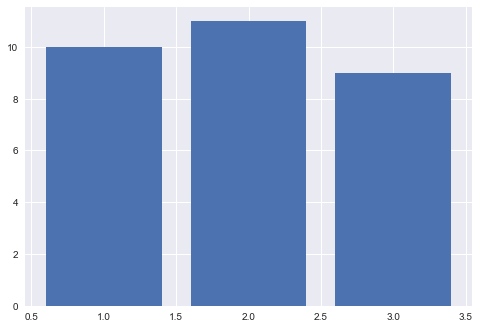

In [46]:

import math     # math 모듈을 가져옴 -->  math.함수명() 이런 식으로 접근

res = math.cos(math.pi / 2)   # math.cos() 함수와, math.pi 변수를 사용했다.
print(res)



import matplotlib.pyplot    # matplotlib 패키지의 pyplot 모듈을 가져옴 -->  matplotlib.pyplot.함수명()  이런 식으로 접근

matplotlib.pyplot.style.use('seaborn')

matplotlib.pyplot.bar([1, 2, 3], [10, 11, 9])
matplotlib.pyplot.show()




2. import와 별칭을 사용하는 방법

```python

    import 모듈명 as 별칭
    import 패키지명.모듈명 as 별칭

```

별칭에 ' . ' 연산자를 이용해서 모듈 안의 클래스, 함수, 또는 변수를 사용할 수 있습니다.

예:


[[0 1 2 3 4]
 [5 6 7 8 9]]


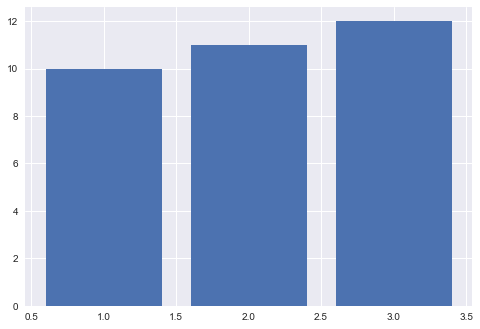

In [47]:

import numpy as np      # numpy 모듈(패키지)을 np 이름으로 가져옴  -->  np.함수명()  방식으로 사용

res = np.arange(10).reshape((2, 5))
print(res)



import matplotlib.pyplot as plt     # matplotlib 패키지의 pyplot 모듈을 plt 이름으로 가져옴  -->  plt.함수명()  방식으로 사용

plt.bar([1, 2, 3], [10, 11, 12])
plt.show()




3. from ... import ...


```python

    from 패키지명 import 모듈명 [as 별칭]
    from 모듈명 import 클래스명, 함수명, 변수명
    from 패키지명.모듈명 import 클래스명, 함수명, 변수명

```

from을 사용하면 클래스, 함수, 변수 레벨로 import 가능합니다.
import 뒤에 사용한 이름 또는 별칭에 ' . ' 연산자를 이용해서 import한 모듈, 클래스, 함수, 또는 변수를 사용할 수 있습니다.

예:


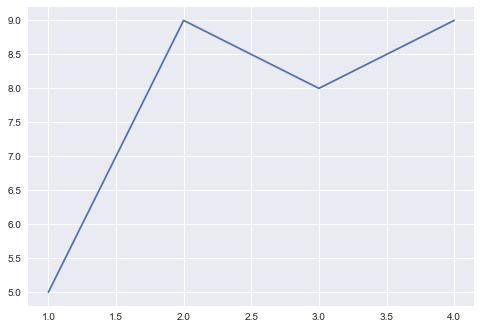

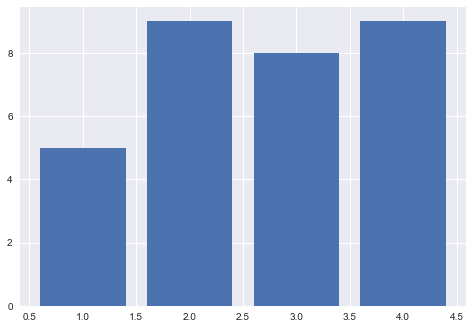

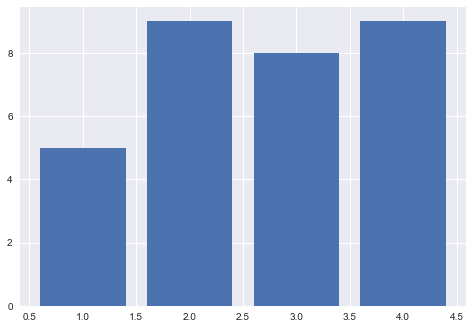

1.0
    0   1   2   3
0  10  20  30  40
1  11  21  31  41


In [48]:

from matplotlib import pyplot             # matplotlib 패키지에 있는 pyplot 모듈을 가져옴  -->  pyplot.함수명()  방식으로 사용

pyplot.plot([1, 2, 3, 4], [5, 9, 8, 9])
pyplot.show()



from matplotlib.pyplot import bar, show   # matplotlib 패키지의 pyplot 모듈에 있는 bar(), show() 함수를 가져옴  -->  bar(), show()  방식으로 사용

bar([1, 2, 3, 4], [5, 9, 8, 9])
show()



from matplotlib.pyplot import bar as b, show as s     # matplotlib 패키지의 pyplot 모듈에 있는 bar() 함수를 "b"라는 별칭으로,
                                                      #   show() 함수를 "s"라는 별칭으로 가져옴  -->  b(), s()  방식으로 사용

b([1, 2, 3, 4], [5, 9, 8, 9])
s()



from math import cos, sin, pi         # math 모듈에 있는 cos(), sin() 함수와 pi 변수를 가져옴  -->  cos(), sin(), pi 로 사용

print(sin(pi / 2))



from pandas import DataFrame as df    # pandas 패키지에 있는 DataFrame 클래스를 df 라는 별칭으로 가져옴  -->  df() 방식으로 사용

a = df([[10, 20, 30, 40], [11, 21, 31, 41]])
print(a)



피아스페이스(주) All Rights Reserved.  

https://www.pia-space.net